## Read the data

In [1]:
import pandas as pd
import numpy as np
from statistics import mean
from numpy import std
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics 
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
import seaborn as sns 
plt.style.use('seaborn')

df = pd.read_excel('data/processed_data.xlsx')
df.shape

(18264, 27)

## Transform the data

In [2]:
# df['statuses_count'] = df['statuses_count'].apply(lambda x: np.log(x + 1)) 
# df['followers_count'] = df['followers_count'].apply(lambda x: np.log(x + 1)) 
# df['friends_count'] = df['friends_count'].apply(lambda x: np.log(x + 1)) 
# df['favourites_count'] = df['favourites_count'].apply(lambda x: np.log(x + 1)) 
# df['listed_count'] = df['listed_count'].apply(lambda x: np.log(x + 1)) 
# df['tweet_freq'] = df['tweet_freq'].apply(lambda x: np.log(x + 1)) 
# df['followers_growth_rate'] = df['followers_growth_rate'].apply(lambda x: np.log(x + 1)) 
# df['friends_growth_rate'] = df['friends_growth_rate'].apply(lambda x: np.log(x + 1)) 
# df['favourites_growth_rate'] = df['favourites_growth_rate'].apply(lambda x: np.log(x + 1)) 
# df['listed_growth_rate'] = df['listed_growth_rate'].apply(lambda x: np.log(x + 1)) 
# df['follower_friend_ratio'] = df['follower_friend_ratio'].apply(lambda x: np.log(x + 1)) 
# df['follower_favorites_ratio'] = df['follower_favorites_ratio'].apply(lambda x: np.log(x + 1)) 
# df['tweet_follower_ratio'] = df['tweet_follower_ratio'].apply(lambda x: np.log(x + 1)) 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffba0709fa0>,
      dtype=object)

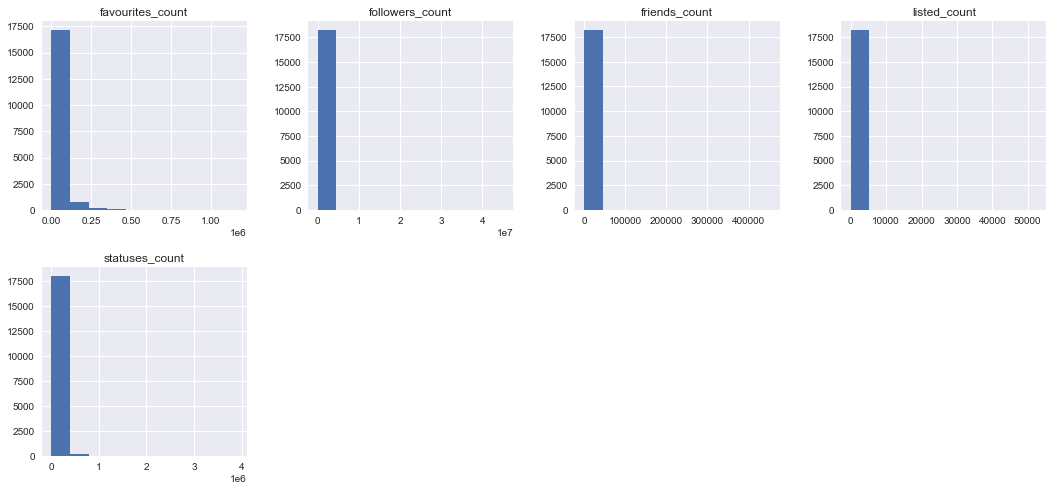

In [3]:
metadata_cols = ['statuses_count', 'followers_count', 'friends_count',
                 'favourites_count', 'listed_count']
meta_data = df[metadata_cols]
meta_data.hist(layout=(2, 4), figsize=(18,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ffbe1a15250>,
      dtype=object)

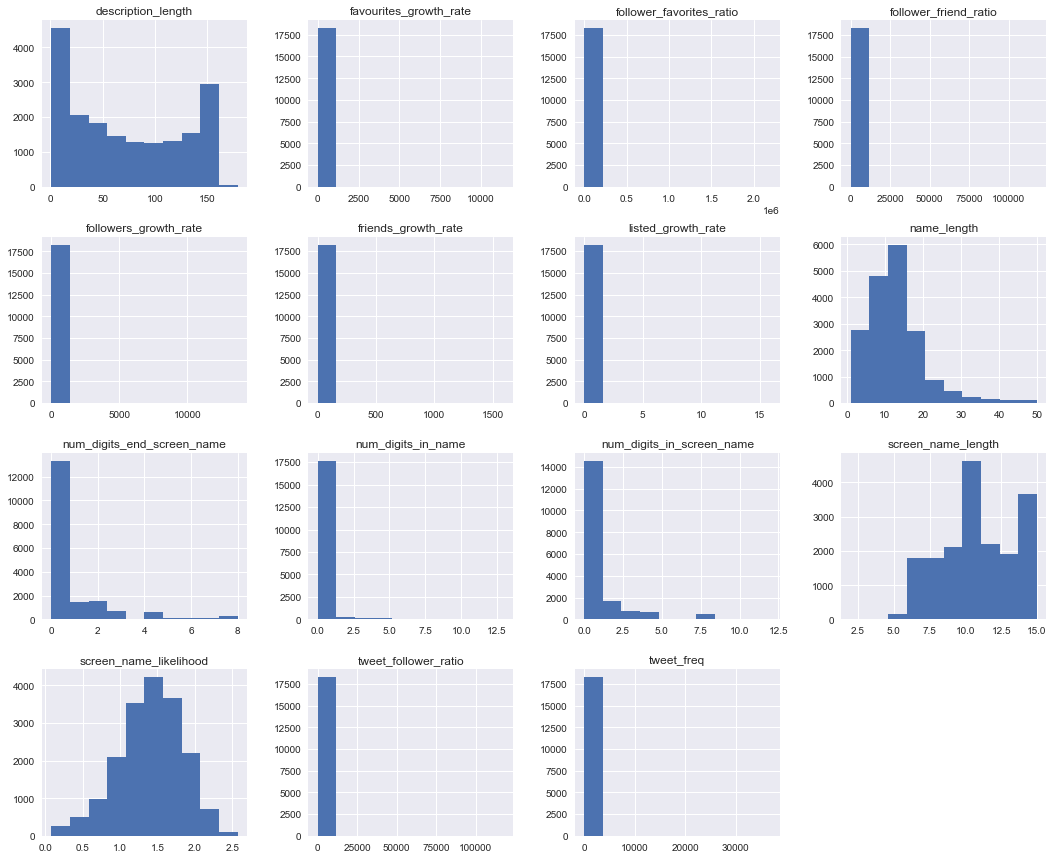

In [4]:
derived_feature_cols = ['tweet_freq', 'followers_growth_rate', 'friends_growth_rate',
                        'favourites_growth_rate', 'listed_growth_rate', 
                        'follower_friend_ratio', 'follower_favorites_ratio', 'tweet_follower_ratio', 
                        'screen_name_length', 'num_digits_in_screen_name',
                        'name_length', 'num_digits_in_name', 'num_digits_end_screen_name',
                        'description_length', 'screen_name_likelihood']
derived_features = df[derived_feature_cols]
derived_features.hist(layout=(4, 4), figsize=(18,15))

## Standardize the data

In [5]:
sc = StandardScaler()
meta_data_standard=StandardScaler().fit_transform(meta_data)# Gaussian Standardisation
meta_data_standard=pd.DataFrame(meta_data_standard,columns=metadata_cols)
derived_features_standard=StandardScaler().fit_transform(derived_features)# Gaussian Standardisation
derived_features_standard=pd.DataFrame(derived_features_standard,columns=derived_feature_cols)
#meta_data_standard.hist(layout=(2, 4), figsize=(18,8))
#derived_features_standard.hist(layout=(4, 4), figsize=(18,15))

## Combine the scaled features

In [6]:
binary_metadata_cols = ['has_default_profile', 'verified']
binary_metadata = df[binary_metadata_cols]
response = df[['fake_follower_raw_en', 'spammer_raw_en']]

merge = pd.concat([binary_metadata.reset_index(drop=True), meta_data_standard], axis=1)
merge = pd.concat([merge.reset_index(drop=True), derived_features_standard], axis=1)
merge = pd.concat([merge.reset_index(drop=True), response], axis=1)
merge.head()

,has_default_profile,verified,statuses_count,followers_count,friends_count,favourites_count,listed_count,tweet_freq,followers_growth_rate,friends_growth_rate,...,tweet_follower_ratio,screen_name_length,num_digits_in_screen_name,name_length,num_digits_in_name,num_digits_end_screen_name,description_length,screen_name_likelihood,fake_follower_raw_en,spammer_raw_en
0,0,0,-0.312014,-0.019464,-0.012900,-0.426581,-0.033107,-0.097727,-0.034429,-0.097395,...,-0.025681,-0.727841,-0.483347,-0.352984,-0.192873,-0.470947,0.352314,-0.730803,0.03,0.01
1,0,0,-0.363346,-0.021820,-0.211149,-0.470738,-0.062101,-0.103557,-0.037159,-0.122645,...,-0.025447,0.039714,-0.483347,0.694697,-0.192873,-0.470947,0.008760,0.140547,0.18,0.03
2,0,0,-0.365544,-0.012943,0.191275,-0.451277,-0.089283,-0.099985,-0.010053,0.016323,...,-0.025265,0.423492,-0.483347,2.266219,-0.192873,-0.470947,1.437224,1.104570,0.03,0.00
3,0,0,-0.322912,-0.021735,-0.156308,-0.408744,-0.091095,-0.095250,-0.036509,-0.108953,...,-0.025916,-0.727841,1.311539,-1.269706,-0.192873,1.444444,-1.184641,-0.318263,0.00,0.00
4,0,0,-0.283863,-0.022260,-0.198389,0.297231,-0.096532,-0.079641,-0.037269,-0.112072,...,-0.026123,1.574824,4.303016,-0.222024,-0.192873,4.636762,-1.238886,0.286960,0.36,0.02


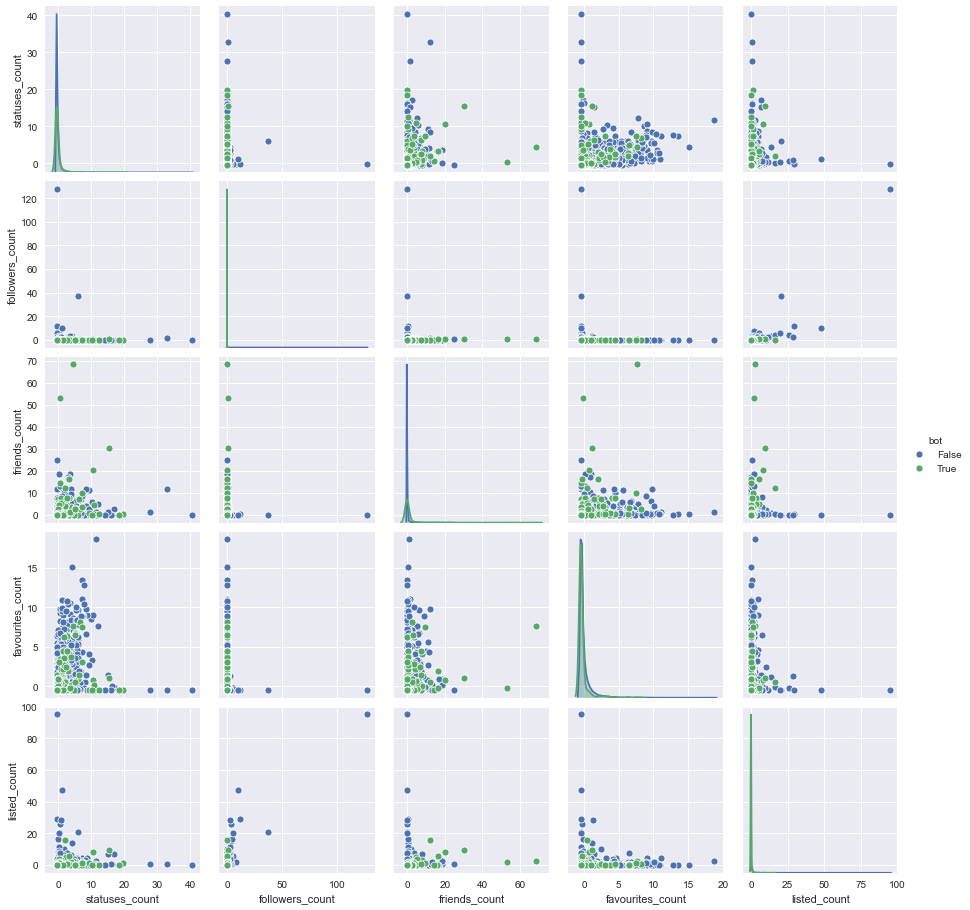

In [7]:
import seaborn as sns 
merge['bot'] = merge['fake_follower_raw_en'] >= 0.6
sns.pairplot(merge[metadata_cols + ['bot']], hue = 'bot')

## Train a random forrest model for Fake Followers

Perform a 10-fold cross validation

In [8]:
def kfold_cv_bot_detection(bot_type, threshold):
    merge['bot'] = merge[bot_type] >= threshold
    cv = KFold(n_splits=10, random_state = 1, shuffle = True)
    rf = RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion="gini")
    features = binary_metadata_cols + metadata_cols + derived_feature_cols
    train_X = merge[features]
    train_y = merge.bot
    f1_scores = cross_val_score(rf, train_X, train_y, scoring = 'f1', cv = cv)
    f1_scores = list(f1_scores)
    precision_scores = cross_val_score(rf, train_X, train_y, scoring = 'precision', cv = cv)
    precision_scores = list(precision_scores)
    recall_scores = cross_val_score(rf, train_X, train_y, scoring = 'recall', cv = cv)
    recall_scores = list(recall_scores)
    print("Results using Botometer threshold of " + str(threshold))
    print("Number of annotated bots: " + str(len(merge[merge['bot'] == True])))
    print('f1 score: ' + str(mean(f1_scores))[0:5] + " +/- " + str(std(f1_scores))[0:5])
    print('precision: ' + str(mean(precision_scores))[0:5] + " +/- " + str(std(precision_scores))[0:5])
    print('recall: '+ str(mean(recall_scores))[0:5] + " +/- " + str(std(recall_scores))[0:5])
    
kfold_cv_bot_detection('fake_follower_raw_en', 0.5)
print('===========================')
kfold_cv_bot_detection('fake_follower_raw_en', 0.6)
print('===========================')
kfold_cv_bot_detection('fake_follower_raw_en', 0.7)

Results using Botometer threshold of 0.5
Number of annotated bots: 1500
f1 score: 0.413 +/- 0.023
precision: 0.672 +/- 0.030
recall: 0.299 +/- 0.032
Results using Botometer threshold of 0.6
Number of annotated bots: 726
f1 score: 0.373 +/- 0.035
precision: 0.634 +/- 0.086
recall: 0.270 +/- 0.029
Results using Botometer threshold of 0.7
Number of annotated bots: 339
f1 score: 0.351 +/- 0.065
precision: 0.626 +/- 0.156
recall: 0.238 +/- 0.047


## BotometerLite Predictions for Fake Followers

In [9]:
def calc_benchmark(j):

    df['bot'] = merge['fake_follower_raw_en'] >= j
    def tune_threshold(k):
        bot_lite_threshold = k
        benchmark = pd.DataFrame({'bot_lite_prediction': df['bot_lite'] >= bot_lite_threshold,
                                  'botometer_label': df['bot']})
        true_pos = sum((benchmark['bot_lite_prediction'] == True) & (benchmark['botometer_label'] == True))
        false_pos = sum((benchmark['bot_lite_prediction'] == True) & (benchmark['botometer_label'] == False))
        true_neg = sum((benchmark['bot_lite_prediction'] == False) & (benchmark['botometer_label'] == False))
        false_neg = sum((benchmark['bot_lite_prediction'] == False) & (benchmark['botometer_label'] == True))
        precision = true_pos/(true_pos + false_pos)
        recall = true_pos/(true_pos + false_neg)
        f1 = 2*(precision*recall)/(precision+recall)
        return f1

    f1_scores = []
    for k in range(0,100):
        f1 = pd.DataFrame({'k': [k/100],
                           'f1': tune_threshold(k/100)})    
        f1_scores.append(f1)
    f1_scores = pd.concat(f1_scores)
    #print(f1_scores[f1_scores['f1'] == max(f1_scores['f1'])])
    #plt.scatter(f1_scores.k, f1_scores.f1)

    bot_lite_threshold = f1_scores['k'][f1_scores['f1'] == max(f1_scores['f1'])][0]
    benchmark = pd.DataFrame({'bot_lite_prediction': df['bot_lite'] >= bot_lite_threshold,
                              'botometer_label': df['bot']})
    true_pos = sum((benchmark['bot_lite_prediction'] == True) & (benchmark['botometer_label'] == True))
    false_pos = sum((benchmark['bot_lite_prediction'] == True) & (benchmark['botometer_label'] == False))
    true_neg = sum((benchmark['bot_lite_prediction'] == False) & (benchmark['botometer_label'] == False))
    false_neg = sum((benchmark['bot_lite_prediction'] == False) & (benchmark['botometer_label'] == True))

    precision = true_pos/(true_pos + false_pos)
    recall = true_pos/(true_pos + false_neg)

    print("When we check precision of BotometerLite against the entire data set, " + str(len(benchmark)) + " accounts")
    print("")
    print("Precision - BotometerLite predicted fake follower " + str(sum(benchmark['bot_lite_prediction'] == True)) + " times and was correct " + str(true_pos) + " times: " + str(precision)[0:5])
    print("Recall - BotometerLite predicted " + str(true_pos) + " out of the " + str(sum(benchmark['botometer_label'] == True)) + " fake followers: " + str(recall)[0:5])
    print("")
    print("BotometerLite's total accuracy was " + str((true_pos + true_neg)/len(benchmark)) + "%")
    print("BotometerLite's F1 score was " + str(2*(precision*recall)/(precision+recall))[0:5])

In [10]:
calc_benchmark(j = 0.5)
print('===========================')
calc_benchmark(j = 0.6)
print('===========================')
calc_benchmark(j = 0.7)

When we check precision of BotometerLite against the entire data set, 18264 accounts

Precision - BotometerLite predicted fake follower 1809 times and was correct 695 times: 0.384
Recall - BotometerLite predicted 695 out of the 1500 fake followers: 0.463

BotometerLite's total accuracy was 0.8949299167761717%
BotometerLite's F1 score was 0.420
When we check precision of BotometerLite against the entire data set, 18264 accounts

Precision - BotometerLite predicted fake follower 982 times and was correct 316 times: 0.321
Recall - BotometerLite predicted 316 out of the 726 fake followers: 0.435

BotometerLite's total accuracy was 0.9410862899693386%
BotometerLite's F1 score was 0.370
When we check precision of BotometerLite against the entire data set, 18264 accounts

Precision - BotometerLite predicted fake follower 767 times and was correct 157 times: 0.204
Recall - BotometerLite predicted 157 out of the 339 fake followers: 0.463

BotometerLite's total accuracy was 0.9566360052562418%
B

**Summary**
- Both models have similar F1 scores: Random Forrest (0.421 +/- 0.024) vs BotometerLite (0.420)
- Random Forrest outperformed BotometerLite on precision: Random Forrest (0.668 +/- 0.053) vs. BotometerLite (0.384)
- BotometerLite outperformed Random Forrest on recall: BotometerLite (0.463) vs. Random Forrest (0.308 +/- 0.030) 

## Bonus material - verify precision and recall corrections are done correctly

In [11]:
merge['ff_bot'] = merge['fake_follower_raw_en'] >= 0.5

features = binary_metadata_cols + metadata_cols + derived_feature_cols
train, test = train_test_split(merge, test_size = 0.2)
train_X = train[features]
train_y = train.ff_bot
test_X = test[features] 
test_y = test.ff_bot  
model=RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion="gini")
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Random Forrest Model is',metrics.accuracy_score(prediction,test_y))
cm = metrics.confusion_matrix(test_y, prediction)
true_pos = cm[1,1]
true_neg = cm[0,0]
false_pos = cm[0,1]
false_neg = cm[1,0]
precision = true_pos/(true_pos + false_pos)
recall = true_pos/(true_pos + false_neg)

print("When we check precision of our RFM model against the test data set, " + str(len(test_y)) + " accounts")
print("")
print("Precision - We predicted fake follower " + str(cm[1,1] + cm[0,1]) + " times and were correct " + str(cm[1,1]) + " times: " + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:5])
print("Recall - We predicted " + str(cm[1,1]) + " out of the " + str(cm[1,1] + cm[1,0]) + " fake followers: " + str(recall)[0:5])
print("")
print("Our total accuracy was " + str((cm[0,0] + cm[1,1])/len(test_y))[0:5])
print("Our F1 score was " + str(2*(precision*recall)/(precision+recall))[0:5])

The accuracy of the Random Forrest Model is 0.929646865589926
When we check precision of our RFM model against the test data set, 3653 accounts

Precision - We predicted fake follower 135 times and were correct 87 times: 0.644
Recall - We predicted 87 out of the 296 fake followers: 0.293

Our total accuracy was 0.929
Our F1 score was 0.403


In [12]:
metrics.precision_score(test_y, prediction)
cm = metrics.confusion_matrix(test_y, prediction)

true_neg = str(cm[0,0]) + "/" + str(cm[0,0] + cm[1,0]) + " (" + str(cm[0,0]/(cm[0,0] + cm[1,0]))[0:5] + ")"
false_pos = str(cm[0,1]) + "/" + str(cm[0,1] + cm[1,1]) + " (" + str(cm[0,1]/(cm[0,1] + cm[1,1]))[0:5] + ")"
false_neg = str(cm[1,0]) + "/" + str(cm[1,0] + cm[0,0]) + " (" + str(cm[1,0]/(cm[1,0] + cm[0,0]))[0:5] + ")"
true_pos = str(cm[1,1]) + "/" + str(cm[1,1] + cm[0,1]) + " (" + str(cm[1,1]/(cm[1,1] + cm[0,1]))[0:5] + ")"

conf_matrix = pd.DataFrame({'Not Fake Follower': [true_neg, false_neg],
                            'Fake Follower': [false_pos, true_pos],
                            'Support': [cm[0,0] + cm[0,1], cm[1,0] + cm[1,1]]},
                    index = ['Not Fake Follower', 'Fake Follower'])
conf_matrix

,Not Fake Follower,Fake Follower,Support
Not Fake Follower,3309/3518 (0.940),48/135 (0.355),3357
Fake Follower,209/3518 (0.059),87/135 (0.644),296


In [13]:
print(metrics.classification_report(test_y,prediction))

              precision    recall  f1-score   support

       False       0.94      0.99      0.96      3357
        True       0.64      0.29      0.40       296

    accuracy                           0.93      3653
   macro avg       0.79      0.64      0.68      3653
weighted avg       0.92      0.93      0.92      3653



In [14]:
pd.Series(model.feature_importances_,index=train_X.columns).sort_values(ascending=False)

statuses_count                0.105027
favourites_count              0.095168
favourites_growth_rate        0.080337
tweet_freq                    0.068735
friends_count                 0.067311
tweet_follower_ratio          0.063911
friends_growth_rate           0.062827
followers_count               0.062404
follower_friend_ratio         0.061465
followers_growth_rate         0.050819
screen_name_likelihood        0.046989
follower_favorites_ratio      0.046943
description_length            0.034870
name_length                   0.033641
listed_growth_rate            0.030580
screen_name_length            0.025495
listed_count                  0.022731
num_digits_end_screen_name    0.014566
num_digits_in_screen_name     0.014520
has_default_profile           0.006679
num_digits_in_name            0.004698
verified                      0.000285
dtype: float64

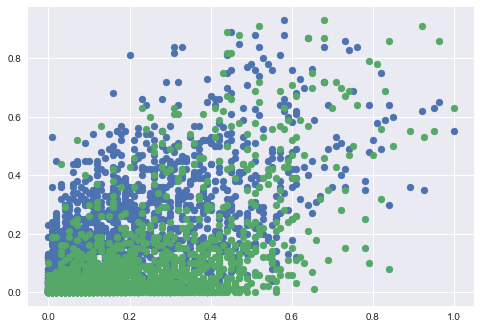

In [24]:
df['ff_bot'] = merge['fake_follower_raw_en'] >= 0.5

features = binary_metadata_cols + metadata_cols + derived_feature_cols
train, test = train_test_split(df, test_size = 0.1)
train_X = train[features]
train_y = train.ff_bot
test_X = test[features] 
test_y = test.ff_bot    
model=RandomForestClassifier(n_estimators=100, n_jobs=-1, criterion="gini")
model.fit(train_X,train_y)
prediction = list(model.predict_proba(test_X)[:,1])
temp = pd.DataFrame({'Botometer':test['fake_follower_raw_en'].tolist(),
                     'sklearn':prediction,
                     'Botometer_lite': test['bot_lite'].tolist()})
plt.scatter(temp.Botometer, temp.Botometer_lite)
plt.scatter(temp.Botometer, temp.sklearn)